In [1]:
# import the basic libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set()

In [2]:
# read the data 
food = pd.read_csv("/FoodBalanceSheets_E_Africa_NOFLAG.csv", 
                   on_bad_lines = "skip", encoding = "ISO-8859-1")
food

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [3]:
# have a look at the data sample stats
food.describe(include = "all")

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943,60943.000000,60943,60943.000000,60943,60943,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
unique,NaN,49,NaN,119,NaN,18,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Kenya,NaN,Milk - Excluding Butter,NaN,Domestic supply quantity,1000 tonnes,NaN,NaN,NaN,NaN,NaN
freq,NaN,1560,NaN,1262,NaN,5295,40933,NaN,NaN,NaN,NaN,NaN
mean,134.265576,NaN,2687.176706,NaN,3814.856456,NaN,NaN,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,NaN,146.055739,NaN,2212.007033,NaN,NaN,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,NaN,2501.000000,NaN,511.000000,NaN,NaN,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,NaN,2562.000000,NaN,684.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,NaN,2630.000000,NaN,5142.000000,NaN,NaN,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,NaN,2775.000000,NaN,5511.000000,NaN,NaN,8.340000,8.460000,8.430000,9.000000,9.000000


In [4]:
# check for missing / nan 
food.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [5]:
#animal fat

food.groupby("Item").sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",77779,1518715,2275409,155038.96,158104.08,156218.90,157752.59,163987.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,87073,1639683,2654934,232670.13,234710.51,239377.07,240047.62,242645.19


In [6]:
# % of missing value as ratio of total rows
per_as_a_frac = 1535 / len(food) 
print (round(per_as_a_frac * 100, 2))

2.52


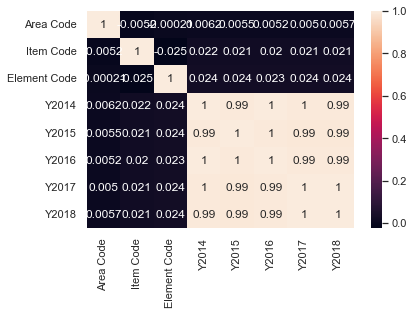

In [7]:
#using heatmap see the correlation between features

cor = food.corr()
sns.heatmap(cor, annot = True);

In [8]:
food.groupby("Element").max()

,Area Code,Area,Item Code,Item,Element Code,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,,,,
Domestic supply quantity,276,Zimbabwe,2961,Yams,5301,1000 tonnes,108756.00,110798.00,116483.00,112625.00,117038.00
Export Quantity,276,Zimbabwe,2961,Yams,5911,1000 tonnes,39686.00,52578.00,35420.00,34641.00,34641.00
Fat supply quantity (g/capita/day),276,Zimbabwe,2961,Yams,684,g/capita/day,93.73,96.79,94.33,97.13,94.94
Feed,276,Zimbabwe,2960,Yams,5521,1000 tonnes,29797.00,30472.00,31607.00,29580.00,31567.00
Food,276,Zimbabwe,2961,Yams,5142,1000 tonnes,49014.00,50705.00,52612.00,51220.00,54077.00
Food supply (kcal/capita/day),276,Zimbabwe,2961,Yams,664,kcal/capita/day,3435.00,3454.00,3451.00,3457.00,3450.00
Food supply quantity (kg/capita/yr),276,Zimbabwe,2961,Yams,645,kg,428.27,418.21,419.48,433.38,443.56
Import Quantity,276,Zimbabwe,2961,Yams,5611,1000 tonnes,19582.00,18824.00,19858.00,18627.00,18036.00
Losses,276,Zimbabwe,2949,Yams,5123,1000 tonnes,9807.00,9999.00,10432.00,10342.00,10355.00


In [9]:
food.groupby("Element").sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [10]:
food.groupby("Element")["Y2018"].sum()

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Total Population - Both sexes             1140605.00
Tourist consumption                            90.00
Name: Y2018, dtype: float64

In [11]:
food.groupby("Element")["Y2018"].max()

Element
Domestic supply quantity                  117038.00
Export Quantity                            34641.00
Fat supply quantity (g/capita/day)            94.94
Feed                                       31567.00
Food                                       54077.00
Food supply (kcal/capita/day)               3450.00
Food supply quantity (kg/capita/yr)          443.56
Import Quantity                            18036.00
Losses                                     10355.00
Other uses (non-food)                      17221.00
Processing                                 22609.00
Production                                118172.00
Protein supply quantity (g/capita/day)       101.08
Residuals                                  17323.00
Seed                                        1474.00
Stock Variation                             2226.00
Total Population - Both sexes             195875.00
Tourist consumption                            6.00
Name: Y2018, dtype: float64

In [12]:
food.groupby("Area")["Y2018"].sum()

Area
Algeria                         341729.98
Angola                          235206.68
Benin                           124960.70
Botswana                         23129.08
Burkina Faso                    112970.72
Cabo Verde                       14622.60
Cameroon                        233022.93
Central African Republic         30101.57
Chad                             72282.24
Comoros                             59.84
Congo                            42005.53
Côte d'Ivoire                   227018.00
Djibouti                         23718.96
Egypt                           852652.92
Eswatini                         55045.07
Ethiopia                        450788.86
Ethiopia PDR                         0.00
Gabon                            28339.38
Gambia                           23513.80
Ghana                           358915.64
Guinea                          103262.08
Guinea-Bissau                    18997.92
Kenya                           270916.80
Lesotho                      